In [19]:
import pandas as pd

train_df = pd.read_csv("DATASET/Training_set.csv")
test_df  = pd.read_csv("DATASET/Testing_set.csv")

(6499, 2)

In [20]:
train_df.shape

(6499, 2)

In [21]:
test_df.shape

(2786, 1)

In [22]:
print("Training CSV columns:", train_df.columns)
print("Testing  CSV columns:", test_df.columns)

Training CSV columns: Index(['filename', 'label'], dtype='object')
Testing  CSV columns: Index(['filename'], dtype='object')


In [24]:
print(train_df.head())

      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART


In [25]:
print(train_df['label'].unique())

['SOUTHERN DOGFACE' 'ADONIS' 'BROWN SIPROETA' 'MONARCH'
 'GREEN CELLED CATTLEHEART' 'CAIRNS BIRDWING' 'EASTERN DAPPLE WHITE'
 'RED POSTMAN' 'MANGROVE SKIPPER' 'BLACK HAIRSTREAK' 'CABBAGE WHITE'
 'RED ADMIRAL' 'PAINTED LADY' 'PAPER KITE' 'SOOTYWING' 'PINE WHITE'
 'PEACOCK' 'CHECQUERED SKIPPER' 'JULIA' 'COMMON WOOD-NYMPH' 'BLUE MORPHO'
 'CLOUDED SULPHUR' 'STRAITED QUEEN' 'ORANGE OAKLEAF' 'PURPLISH COPPER'
 'ATALA' 'IPHICLUS SISTER' 'DANAID EGGFLY' 'LARGE MARBLE'
 'PIPEVINE SWALLOW' 'BLUE SPOTTED CROW' 'RED CRACKER' 'QUESTION MARK'
 'CRIMSON PATCH' 'BANDED PEACOCK' 'SCARCE SWALLOW' 'COPPER TAIL'
 'GREAT JAY' 'INDRA SWALLOW' 'VICEROY' 'MALACHITE' 'APPOLLO'
 'TWO BARRED FLASHER' 'MOURNING CLOAK' 'TROPICAL LEAFWING' 'POPINJAY'
 'ORANGE TIP' 'GOLD BANDED' 'BECKERS WHITE' 'RED SPOTTED PURPLE'
 'MILBERTS TORTOISESHELL' 'SILVER SPOT SKIPPER' 'AMERICAN SNOOT' 'AN 88'
 'ULYSES' 'COMMON BANDED AWL' 'CRECENT' 'METALMARK' 'SLEEPY ORANGE'
 'PURPLE HAIRSTREAK' 'ELBOWED PIERROT' 'GREAT EGGFLY' 'ORCHARD 

In [26]:
print(train_df['label'].nunique())

75


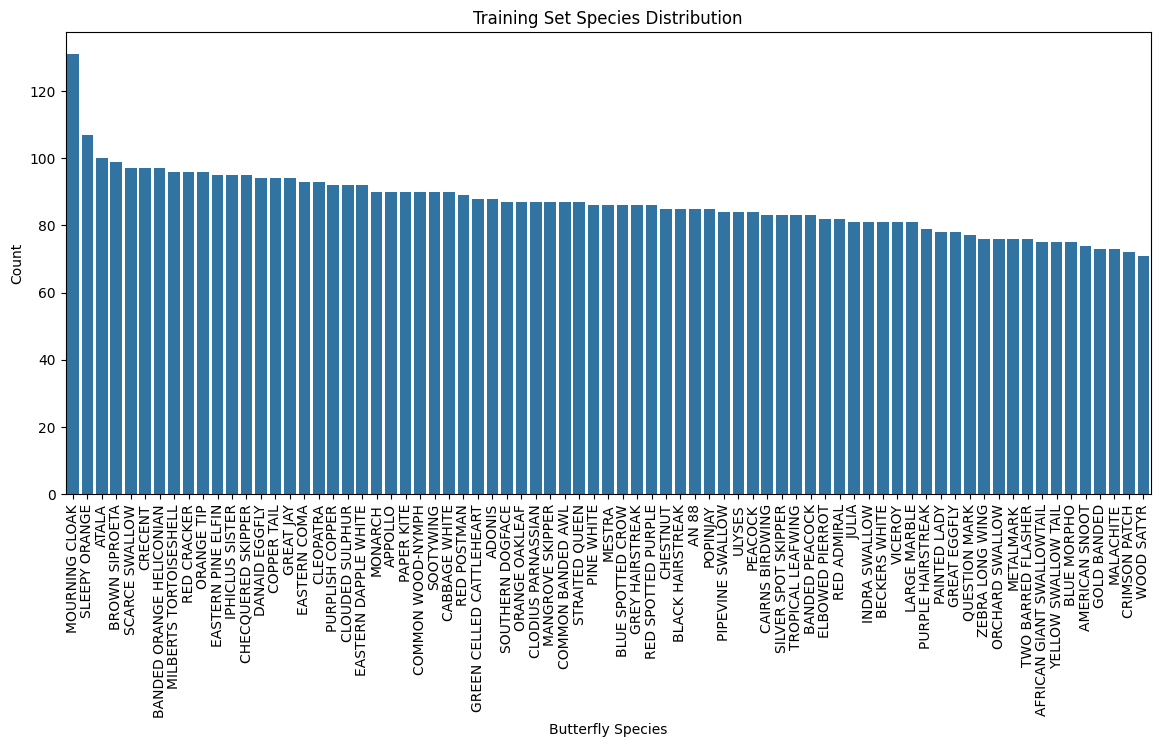

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = train_df['label'].value_counts()
plt.figure(figsize=(14,6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=90)
plt.title("Training Set Species Distribution")
plt.xlabel("Butterfly Species")
plt.ylabel("Count")
plt.show()


In [46]:
train_dir = "DATASET/train"
test_dir = "DATASET/test"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col="filename",
    y_col="label",
    target_size=(128,128),
    class_mode="categorical",
    batch_size=32,
    subset="training"
)

val_data = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col="filename",
    y_col="label",
    target_size=(128,128),
    class_mode="categorical",
    batch_size=32,
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="filename",
    y_col=None,
    target_size=(128,128),
    class_mode=None,
    batch_size=32,
    shuffle=False
)


Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.
Found 2786 validated image filenames.


In [47]:
print("Train samples:", train_data.n)
print("Validation samples:", val_data.n)
print("Test samples:", test_data.n)

Train samples: 5200
Validation samples: 1299
Test samples: 2786


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(75, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,314,315 (12.64 MB)

 Trainable params: 3,314,315 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",    
    patience=3,           
    restore_best_weights=True
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop]
)



Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 40s 245ms/step - accuracy: 0.2958 - loss: 2.6873 - val_accuracy: 0.3911 - val_loss: 2.2933
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 40s 248ms/step - accuracy: 0.3767 - loss: 2.2563 - val_accuracy: 0.4842 - val_loss: 1.9679
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 40s 244ms/step - accuracy: 0.4552 - loss: 1.9311 - val_accuracy: 0.5166 - val_loss: 1.8388
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 39s 241ms/step - accuracy: 0.5102 - loss: 1.7055 - val_accuracy: 0.5366 - val_loss: 1.6843
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - accuracy: 0.5683 - loss: 1.4467 - val_accuracy: 0.5443 - val_loss: 1.6776
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 42s 255ms/step - accuracy: 0.6225 - loss: 1.2492 - val_accuracy: 0.5627 - val_loss: 1.6159
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 267ms/step - accuracy: 0.6673 - loss: 1.0882 - val_accuracy: 0.5735 - val_loss: 1.6206
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.6827 - loss: 1

In [54]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])

Final Training Accuracy: 0.7057692408561707
Final Validation Accuracy: 0.5742878913879395
Final Training Loss: 0.9064158201217651
Final Validation Loss: 1.6485912799835205


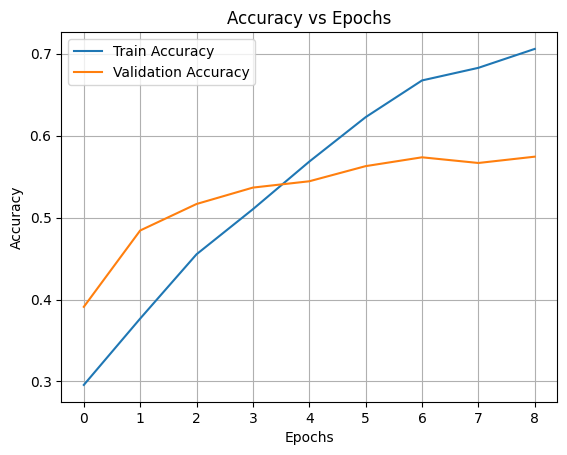

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

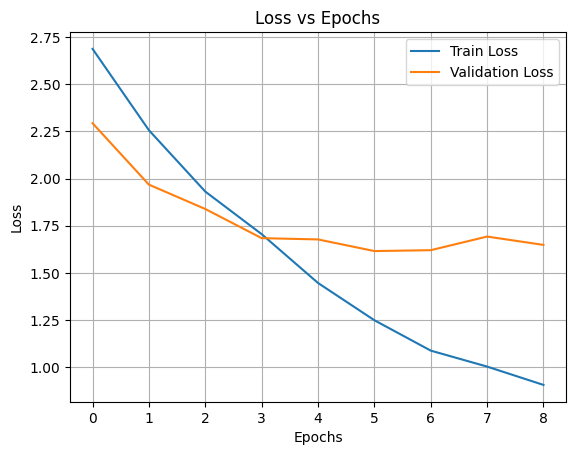

In [59]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()